In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
N = 1000

In [3]:
# First gaussian
mu1, sigma1 = 0, 1
g1 = np.random.normal(mu1, sigma1, N)

In [4]:
# Second gaussian
mu2, sigma2 = 1, 1 
g2 = np.random.normal(mu2, sigma2, N)

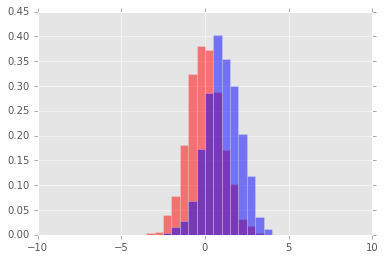

In [11]:
bins=np.arange(-10,10.5,0.5)
fig = plt.figure()
plt.hist(g1 ,bins, alpha = 0.5, color='r', normed = 1)
plt.hist(g2 ,bins, alpha = 0.5, color='b', normed = 1)
plt.show()

In [6]:
g1s = np.sort(g1)
x1 = np.array(range(N))/float(N)
g2s = np.sort(g2)
x2 = np.array(range(N))/float(N)

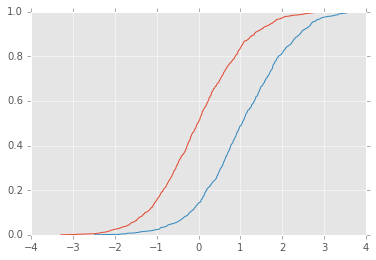

In [7]:
plt.plot(g1s, x1)
plt.plot(g2s, x2)
plt.show()

In [8]:
q1 = []
q2 = []
for i in range(0,110,10):
    print i, np.percentile(g1s, i), np.percentile(g2s, i)
    q1.append(np.percentile(g1s, i))
    q2.append(np.percentile(g2s, i))

0 -3.29274917542 -2.48358917152
10 -1.27846185181 -0.207085212837
20 -0.848992485758 0.194513698882
30 -0.543868858238 0.532033075494
40 -0.270540688323 0.771924884509
50 -0.0198428550133 1.0380486332
60 0.226553711245 1.3283788338
70 0.523439510793 1.61025770882
80 0.871613023757 1.90317387585
90 1.33095896878 2.41662104411
100 3.38961700198 3.94390090193


In [9]:
# vector with the corrected mc->data value
corr = []

for evt in g1s:
    qmc_low  = 0
    qmc_high = 0
    q = 1
    # print evt

    # find the quantile in mc
    while (q1[q] < evt) and (q < len(q1)):
        # print "mc   ", q, len(q1), q1[q-1], q1[q], evt
            q+=1
    qmc_low  = q1[q-1]
    qmc_high = q1[q]
    # print "mc-quantile    ", q, " --> [ ", qmc_low ,qmc_high, " ]"

    # find the corresponding one in data
    qdata_low  = 0
    qdata_high = 0
    qdata_low  = q2[q-1]
    qdata_high = q2[q]
    # print "data-quantiles  --> [ ", qdata_low ,qdata_high, " ]"
    
    # interplopate the correction
    evtCorr = (qdata_high-qdata_low)/(qmc_high-qmc_low) * (evt - qmc_low) + qdata_low
    # print "Apply correction: Input value = ", evt, " --> corrected value = ", evtCorr
    corr.append(evtCorr)

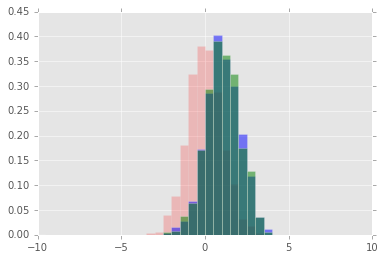

In [12]:
fig = plt.figure()
plt.hist(g1  ,bins, alpha = 0.2, color='r', normed = 1)
plt.hist(g2  ,bins, alpha = 0.5, color='b', normed = 1)
plt.hist(corr,bins, alpha = 0.5, color='g', normed = 1)
plt.show()